In [150]:
import pandas as pd
import numpy as np

In [151]:
import matplotlib.pyplot as plt

In [152]:
cancer = pd.read_csv('/Users/Pawan Kumar/Downloads/breast-cancer-data.csv')

In [153]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [154]:
ID = cancer.id

In [155]:
cancer.drop('id', axis =1, inplace=True)

In [156]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [157]:
cancer.diagnosis = cancer.diagnosis.map({"M":1, 'B':0})

In [25]:
# cancer.isnull().sum()

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
y = cancer.diagnosis
x = cancer.drop('diagnosis',axis = 1)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =8380, test_size = 0.30)

In [174]:

from sklearn.preprocessing import StandardScaler


In [175]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [176]:
from sklearn import metrics
def models(x_train, y_train):
#     logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)
    log_pred = log.predict(x_test)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    # Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=None, criterion='entropy')
    forest.fit(x_train, y_train)
    forest_pred = forest.predict(x_test)
    
    # Accuracy 
    print("1.Accuracy of Logistic model is :", metrics.accuracy_score(y_test,log_pred))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, log_pred))
    print("2.Accuracy of Decision tree model is :", metrics.accuracy_score(y_test,tree_pred))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, tree_pred))
    print("3.Accuracy of Random Forest model is :", metrics.accuracy_score(y_test,forest_pred))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, forest_pred))
    
#     return log, tree, forest


    
    

In [177]:
models(x_train, y_train, )

1.Accuracy of Logistic model is : 0.9824561403508771
The confusion matrix is : [[104   0]
 [  3  64]]
2.Accuracy of Decision tree model is : 0.9590643274853801
The confusion matrix is : [[102   2]
 [  5  62]]
3.Accuracy of Random Forest model is : 0.9649122807017544
The confusion matrix is : [[104   0]
 [  6  61]]


C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [117]:
import seaborn as sns

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


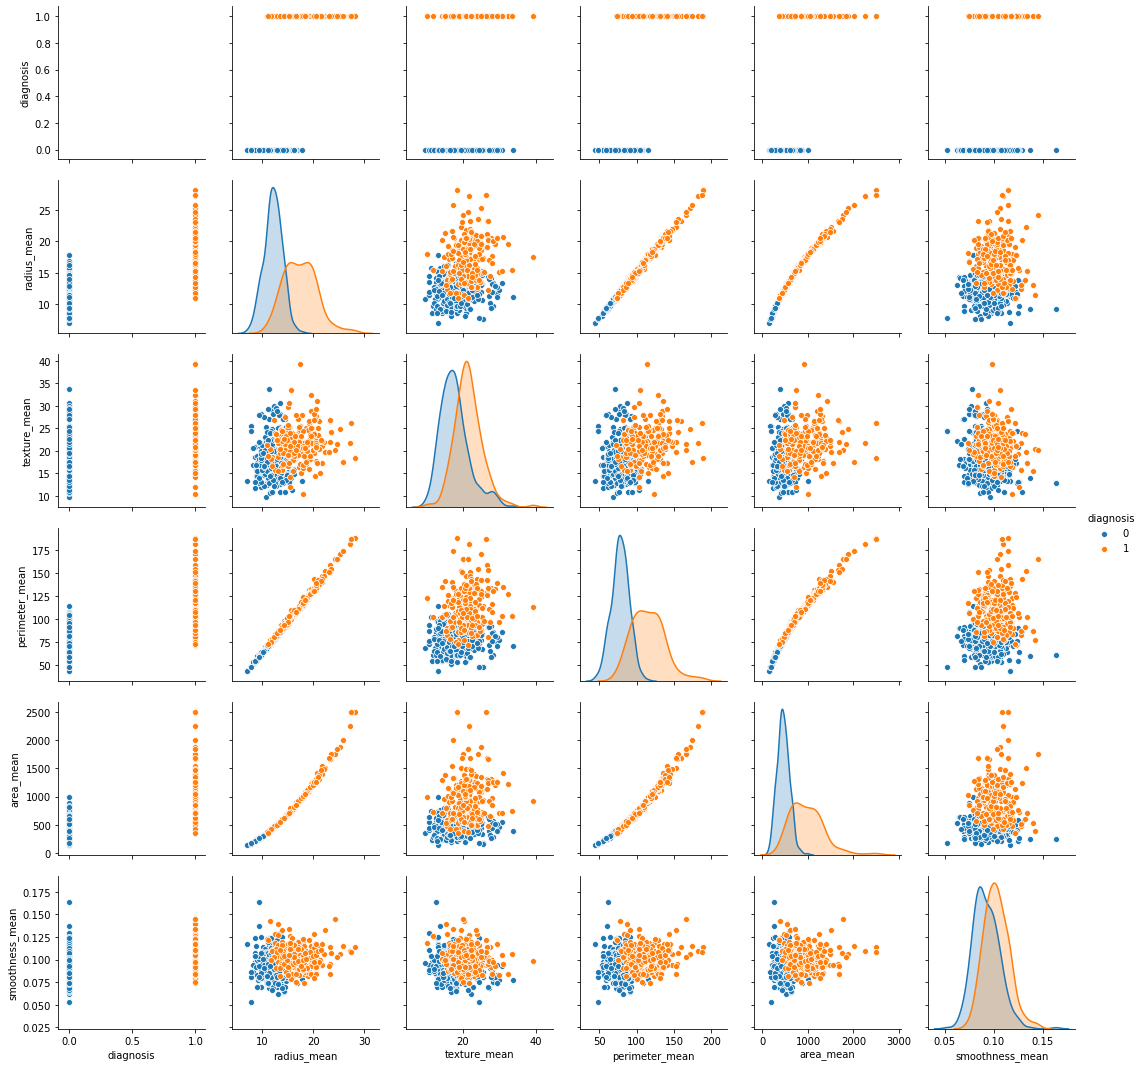

In [159]:
sns.pairplot(cancer.iloc[:, 0:6],hue = 'diagnosis')

In [148]:
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64